# AgriWeather_EDA

- ```'../data/Data Collection/AgriWether.ipynb'``` 파일에서 수집한 데이터를 포함하여 EDA하는 파일

In [1]:
import sys
import os
from glob import glob
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

sys.path.append("../Import")
from definitions import crop_list2
from modul import reduce_mem_usage

root_path = "../"
data_path = f"{root_path}data/"

In [7]:
class EDA:

    
    import numpy as np
    import pandas as pd
    pd.options.display.float_format = '{:.3f}'.format

    import matplotlib.pyplot as plt
    import koreanize_matplotlib
    %config InlineBackend.figure_format = 'retina'
    import seaborn as sns


    def __init__(
            self:pd.DataFrame,
            df,
            Product=None,
            idx=None,
            x=None,
            y=None,
            fig_col_len=2,
            cheetkey=None,
            ) -> pd.DataFrame:
        
        if cheetkey == "AgriMarket":
            if x == None:
                x = ['환율(원/US$)', '콜금리(연%)', 'item_PPI', 'item_CPI', 'Food Price Index', 'Cereals']
            if y == None:
                y = "Price"
    
        elif cheetkey == "AgriWeather":
            if x == None:
                x = ['DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity', 'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine', 'Warning_Count']
            if y == None:
                y = "DayAvg_Temperature"
        else:
            pass

        self.idx = idx
        if idx != None:
            temp = df.set_index(idx)
            self.df = temp
        else:
            self.df = df

        self.Product = Product
        if Product != None:
            self.df = df[df["Product"] == "마늘"]

        self.x = x
        self.y = y
        self.fig_col_len = fig_col_len



        # 로그 변환
        df_log1p = df.copy()
        for i in x:
            df_log1p[i] = np.log1p(df[i])
        self.df_log1p = df_log1p

        # 로그변환 -> 로버스트스케일링
        # from sklearn.preprocessing import RobustScaler
        # transformer = RobustScaler().fit_transform(df_log1p[x])
        # df_log1p_robSc = df_log1p.copy()
        # df_log1p_robSc[x] = transformer
        # self.df_log1p_robSc = df_log1p_robSc



    def print_title(body, br=2, bp="┌▣ ", hr=" ---- ---- ---- ----"):

        """
        body : 내용
        bp : bullet point, 글머리 기호
        hr : Horizontal Rule, 수평선
        """

        class ff:
            PURPLE = "\033[95m"
            CYAN = "\033[96m"
            DARKCYAN = "\033[36m"
            BLUE = "\033[94m"
            GREEN = "\033[92m"
            YELLOW = "\033[93m"
            RED = "\033[91m"
            BOLD = "\033[1m"
            UNDERLINE = "\033[4m"
            END = "\033[0m"

        print("\n" * br + ff.BOLD + bp + ff.UNDERLINE + body + ff.END + hr)
        

    def Check_df(df) -> pd.DataFrame:

        EDA.print_title("""df.shape""")
        print(df.shape)


        EDA.print_title("""df.info()""")
        print(df.info())

        EDA.print_title("""df.head()""")
        display(df.head())

        EDA.print_title("""df.columns.to_list()""")
        print(df.columns.to_list())

    def Check_self(self) -> pd.DataFrame:

        df = self.df
        df_log1p = self.df_log1p
        # df_log1p_robSc = self.df_log1p_robSc

        EDA.print_title("""df.shape""")
        print(df.shape)

        EDA.print_title("""df.info()""")
        print(df.info())

        EDA.print_title("""df.head()""")
        display(df.head())

    def uv(self) -> None:

        df = self.df
        df_log1p = self.df_log1p
        # df_log1p_robSc = self.df_log1p_robSc
        
        fig_col_len = self.fig_col_len
        import math
        fig_row_len = math.ceil(len(self.x) / fig_col_len)
        
        EDA.print_title("""df.describe().T""")
        display(df.describe().T)

        EDA.print_title("""df.describe(include=['O'])""")
        display(df.describe(include=["O"]))

        # 결측치
        df_temp = df.isna()
        EDA.print_title("""df.isna().sum()""")
        display(df_temp.sum().to_frame())

        EDA.print_title("""sns.heatmap(data=df.isna())""")
        sns.heatmap(data=df.isna(), cmap='Greys')
        plt.title("""sns.heatmap(data=df.isna())""", fontsize=20)
        plt.show()

        EDA.print_title("df.isna().mean()")
        display(df_temp.mean().to_frame())

        # 분포 - hist
        EDA.print_title("df.hist()")
        df[self.x].hist(bins=100, figsize=(20, 12))
        plt.show()
        # 로그 변환 후 분포
        EDA.print_title("df_log1p.hist()")
        df_log1p[self.x].hist(bins=100, figsize=(20, 12))
        plt.show()
        # # 로그변환 -> 로버스트 스케일링 후 분포
        # EDA.print_title("df_log1p_robSc.hist()")
        # df_log1p_robSc[self.x].hist(bins=100, figsize=(20, 12))
        # plt.show()

        # # 분포 - v, sns.violinplot(df_log1p, x="Food Price Index")
        # fig, axes = plt.subplots(fig_col_len, fig_row_len, figsize=(20, 8))
        # for i in range(fig_col_len):
        #     for j in range(fig_row_len):
        #         sns.violinplot(data=df, x=self.x, ax=axes[i][j])
        # plt.show()
        # # 분포 - d, sns.displot(data=df_raw, x=df_raw.columns[7], kde=True)
        # fig, axes = plt.subplots(fig_col_len, fig_row_len, figsize=(20, 8))
        # for i in range(fig_col_len):
        #     for j in range(fig_row_len):
        #         sns.displot(data=df, x=self.x, ax=axes[i][j])
        # plt.show()

        # # price
        # EDA.print_title(f"""df["{self.y}"].hist()""")
        # df.groupby("YMD")[self.y].plot(figsize=(20, 8))
        # plt.title(f"{self.Product} 도매가격 변동 그래프", fontsize=20)
        # plt.show()

    def mv(self) -> None:

        df = self.df
        df_log1p = self.df_log1p
        # df_log1p_robSc = self.df_log1p_robSc

        fig_col_len = self.fig_col_len
        import math
        fig_row_len = math.ceil(len(self.x) / fig_col_len)
        
        df_corr = df.corr()
        EDA.print_title("""df.corr()""")
        display(df_corr)
        EDA.print_title("""sns.heatmap(data=df.corr(), annot=True, fmt=".2f")""")
        display(sns.heatmap(data=df_corr, annot=True, fmt=".2f"))

        # fig, axes = plt.subplots(fig_col_len, fig_row_len, figsize=(20, 8))
        # for i in range(fig_col_len):
        #     for j in range(fig_row_len):
        #         sns.regplot(data=df, x=self.x, y=self.y, ax=axes[i][j])

# 파일 불러오기

In [3]:
df_raw = pd.read_csv(f"{data_path}AgriWeather.csv")
EDA.Check_df(df_raw)



┌▣ df.shape ---- ---- ---- ----
(23368, 9)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YMD                      23368 non-null  object 
 1   Crop_Name                23368 non-null  object 
 2   DayAvg_Temperature       23368 non-null  float64
 3   DayDiff_Temperature      23368 non-null  float64
 4   DayAvg_RelativeHumidity  23368 non-null  float64
 5   DaySum_Rainfall          23368 non-null  float64
 6   DayAvg_WindSpeed         23368 non-null  float64
 7   DaySum_Sunshine          23368 non-null  float64
 8   Warning_Count            23368 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB
None


┌▣ df.head() ---- ---- ---- ----


,YMD,Crop_Name,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-01,감자,-3.750,9.250,44.000,0.750,2.250,3.500,0.000
1,2005-01-01,고구마,-3.000,8.000,0.000,0.000,2.000,0.000,0.000
2,2005-01-01,깻잎,-3.500,8.000,29.000,0.000,1.500,4.000,0.000
3,2005-01-01,마늘,-1.200,7.200,31.400,1.400,2.200,2.800,0.000
4,2005-01-02,감자,-0.250,10.750,48.250,0.000,1.750,0.500,0.000




┌▣ df.columns.to_list() ---- ---- ---- ----
['YMD', 'Crop_Name', 'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity', 'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine', 'Warning_Count']


# 단변량 비시각화 분석

In [8]:
# 분석할 데이터 할당
df = df_raw.copy()
df = df.rename(columns={"Crop_Name":"Product"})
# df = reduce_mem_usage(df)

ead = EDA(
    df,
    Product="마늘",
    cheetkey = "AgriWeather"
)



┌▣ df.describe().T ---- ---- ---- ----


,count,mean,std,min,25%,50%,75%,max
DayAvg_Temperature,5842.000,13.243,9.176,-8.625,5.000,14.000,21.400,30.400
DayDiff_Temperature,5842.000,9.899,3.255,-3.200,7.600,9.636,12.000,22.667
DayAvg_RelativeHumidity,5842.000,57.614,17.562,0.000,42.800,57.800,72.400,97.000
DaySum_Rainfall,5842.000,3.371,9.477,0.000,0.000,0.000,1.800,157.750
DayAvg_WindSpeed,5842.000,1.569,0.813,0.000,1.000,1.400,2.000,6.778
DaySum_Sunshine,5842.000,3.007,2.022,0.000,1.250,3.000,4.600,9.500
Warning_Count,5842.000,0.145,0.262,0.000,0.000,0.000,0.200,1.000




┌▣ df.describe(include=['O']) ---- ---- ---- ----


,YMD,Product
count,5842,5842
unique,5842,1
top,2005-01-01,마늘
freq,1,5842




┌▣ df.isna().sum() ---- ---- ---- ----


,0
YMD,0
Product,0
DayAvg_Temperature,0
DayDiff_Temperature,0
DayAvg_RelativeHumidity,0
DaySum_Rainfall,0
DayAvg_WindSpeed,0
DaySum_Sunshine,0
Warning_Count,0




┌▣ sns.heatmap(data=df.isna()) ---- ---- ---- ----


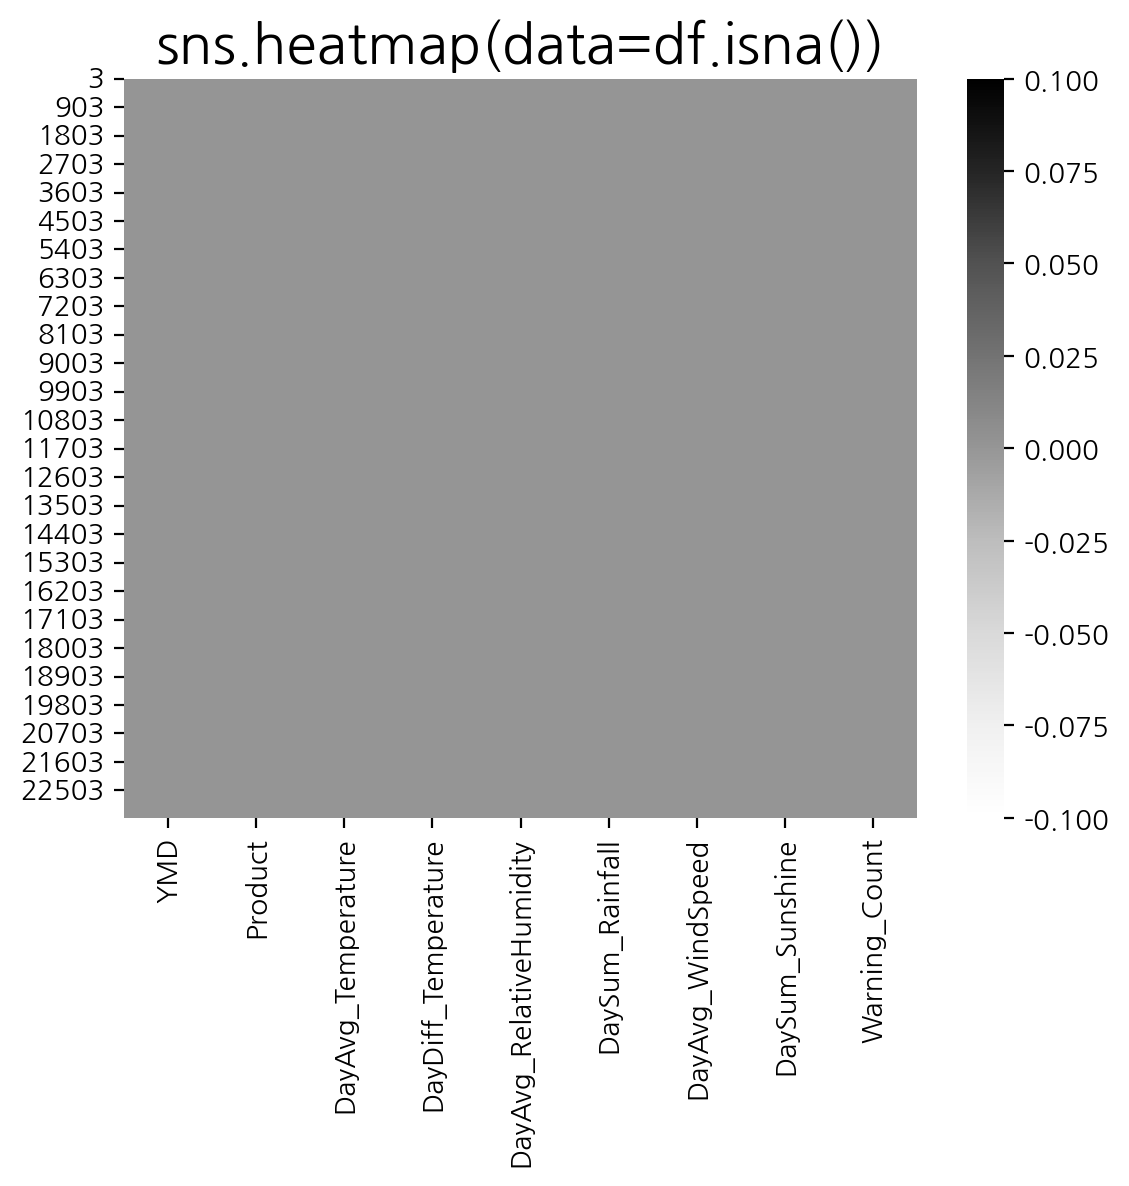



┌▣ df.isna().mean() ---- ---- ---- ----


,0
YMD,0.000
Product,0.000
DayAvg_Temperature,0.000
DayDiff_Temperature,0.000
DayAvg_RelativeHumidity,0.000
DaySum_Rainfall,0.000
DayAvg_WindSpeed,0.000
DaySum_Sunshine,0.000
Warning_Count,0.000




┌▣ df.hist() ---- ---- ---- ----


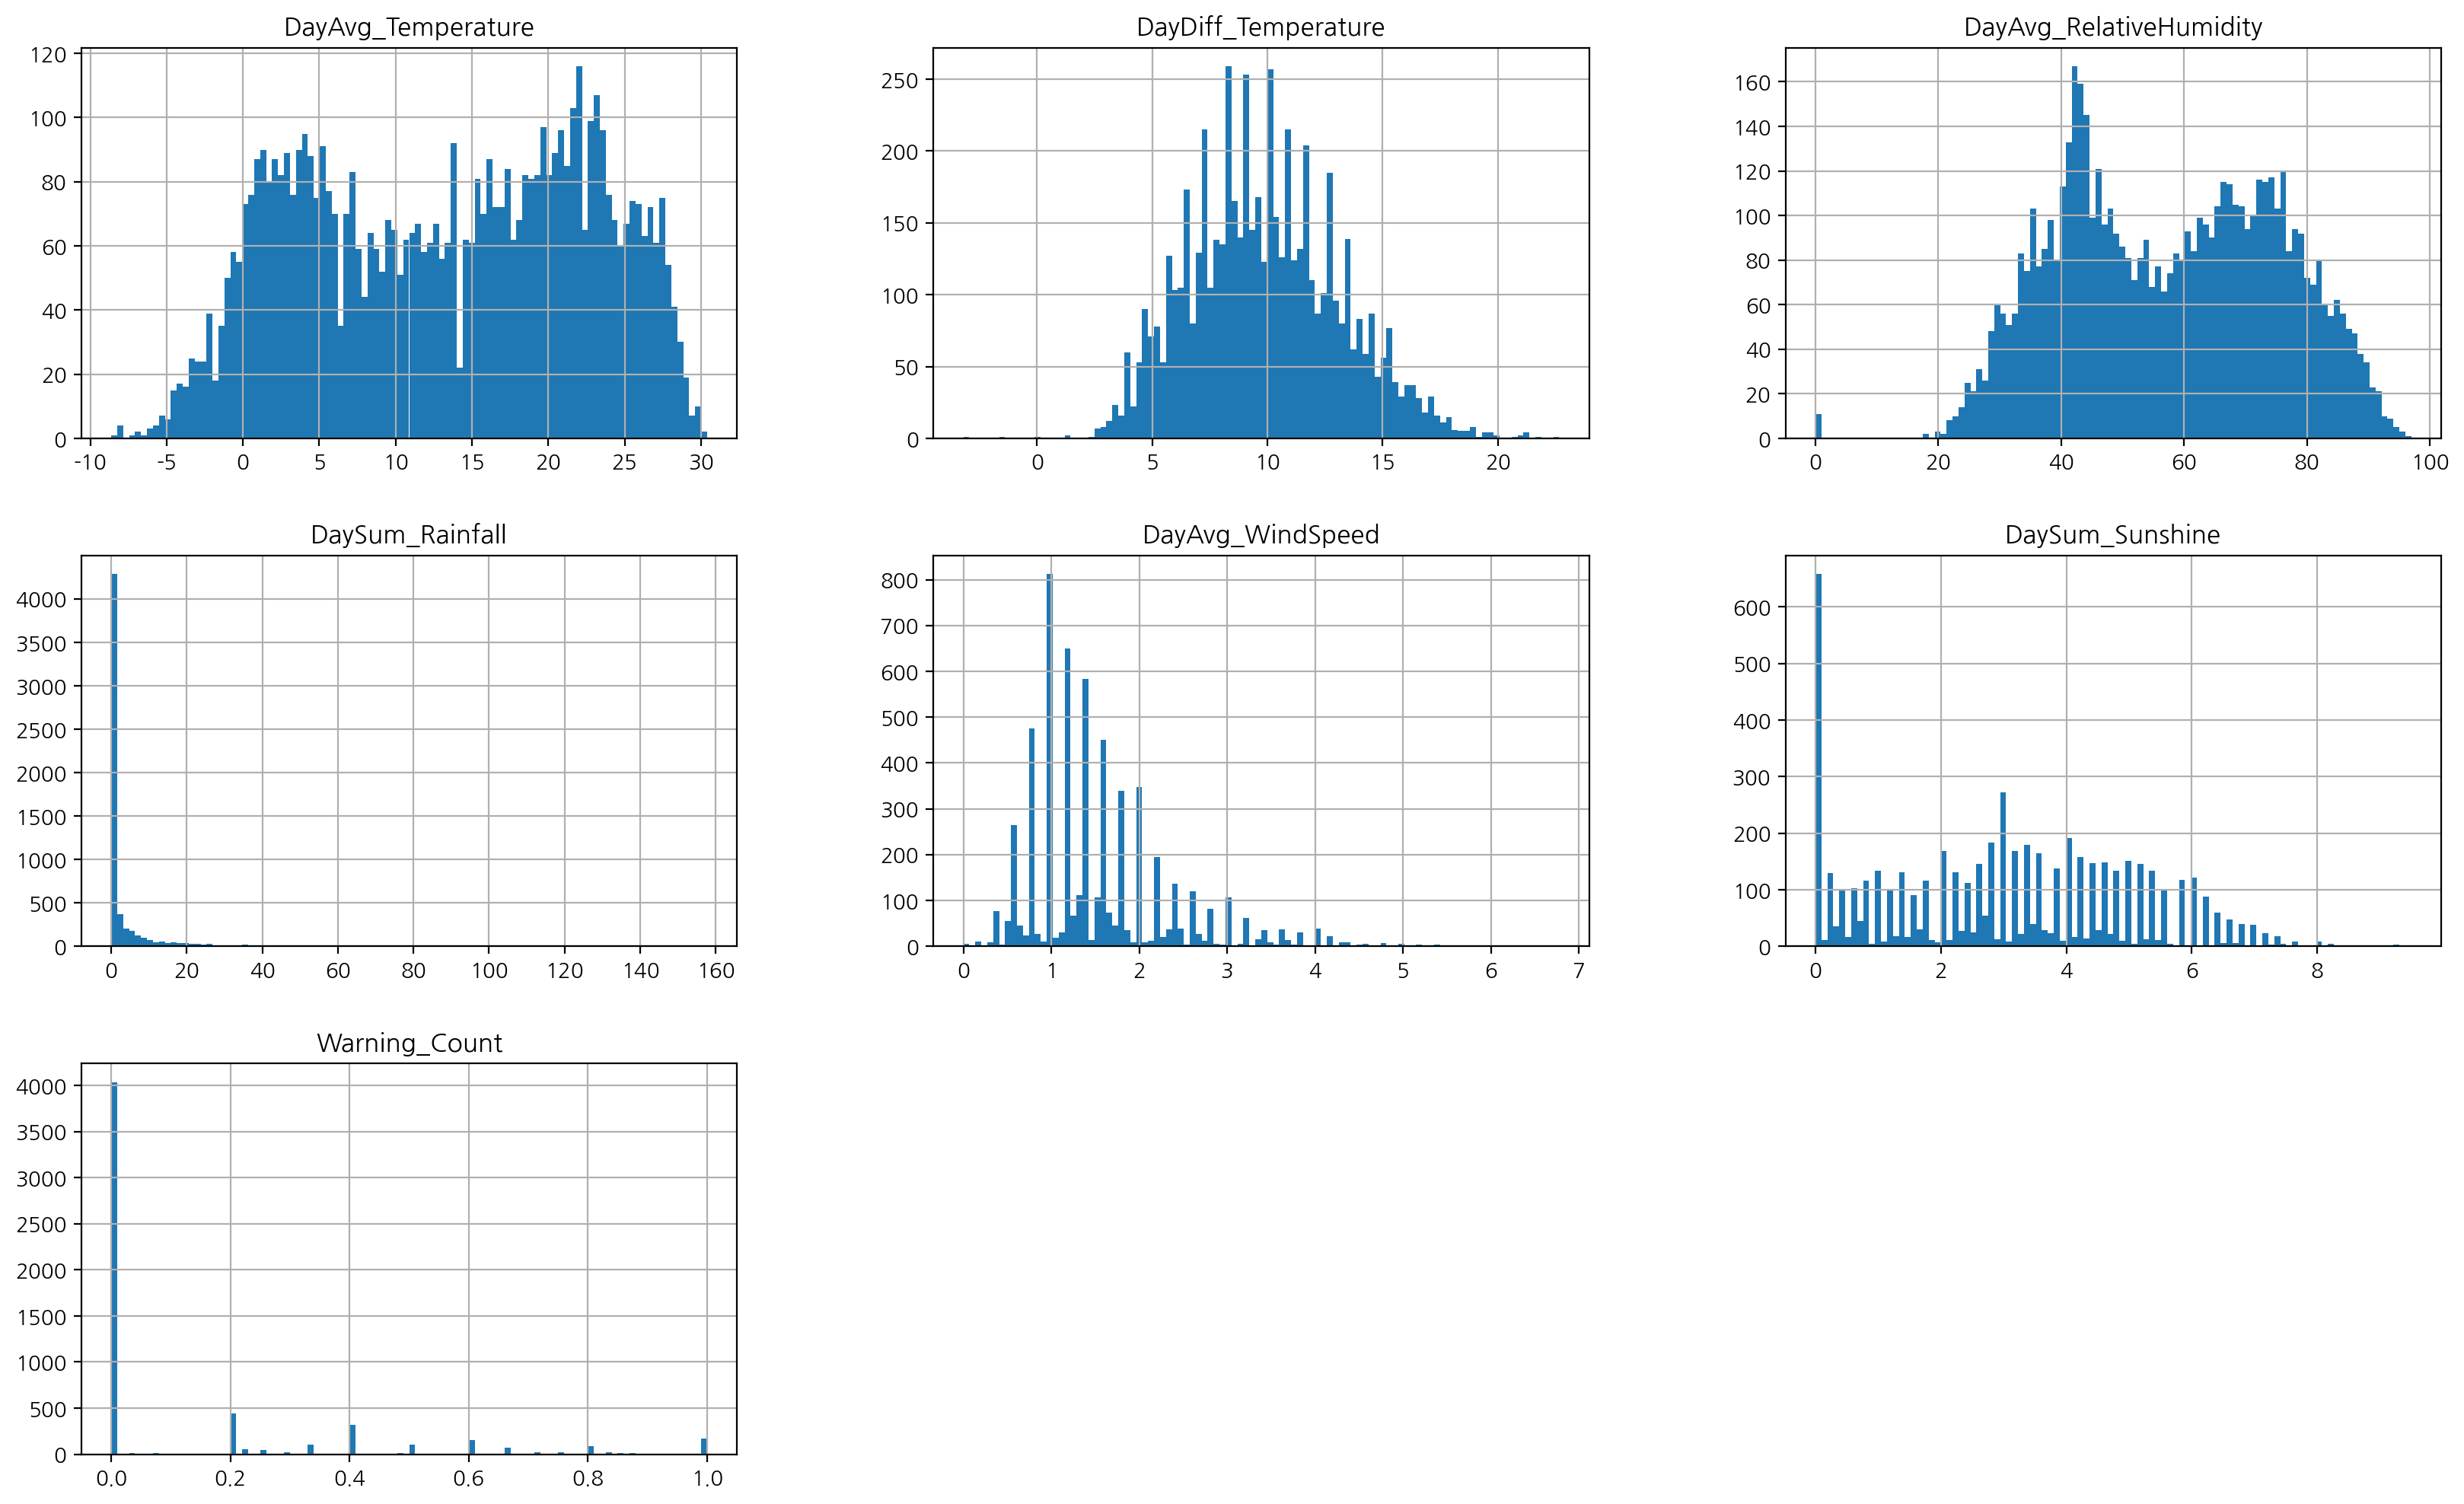



┌▣ df_log1p.hist() ---- ---- ---- ----


ValueError: supplied range of [-inf, 3.449987545831587] is not finite

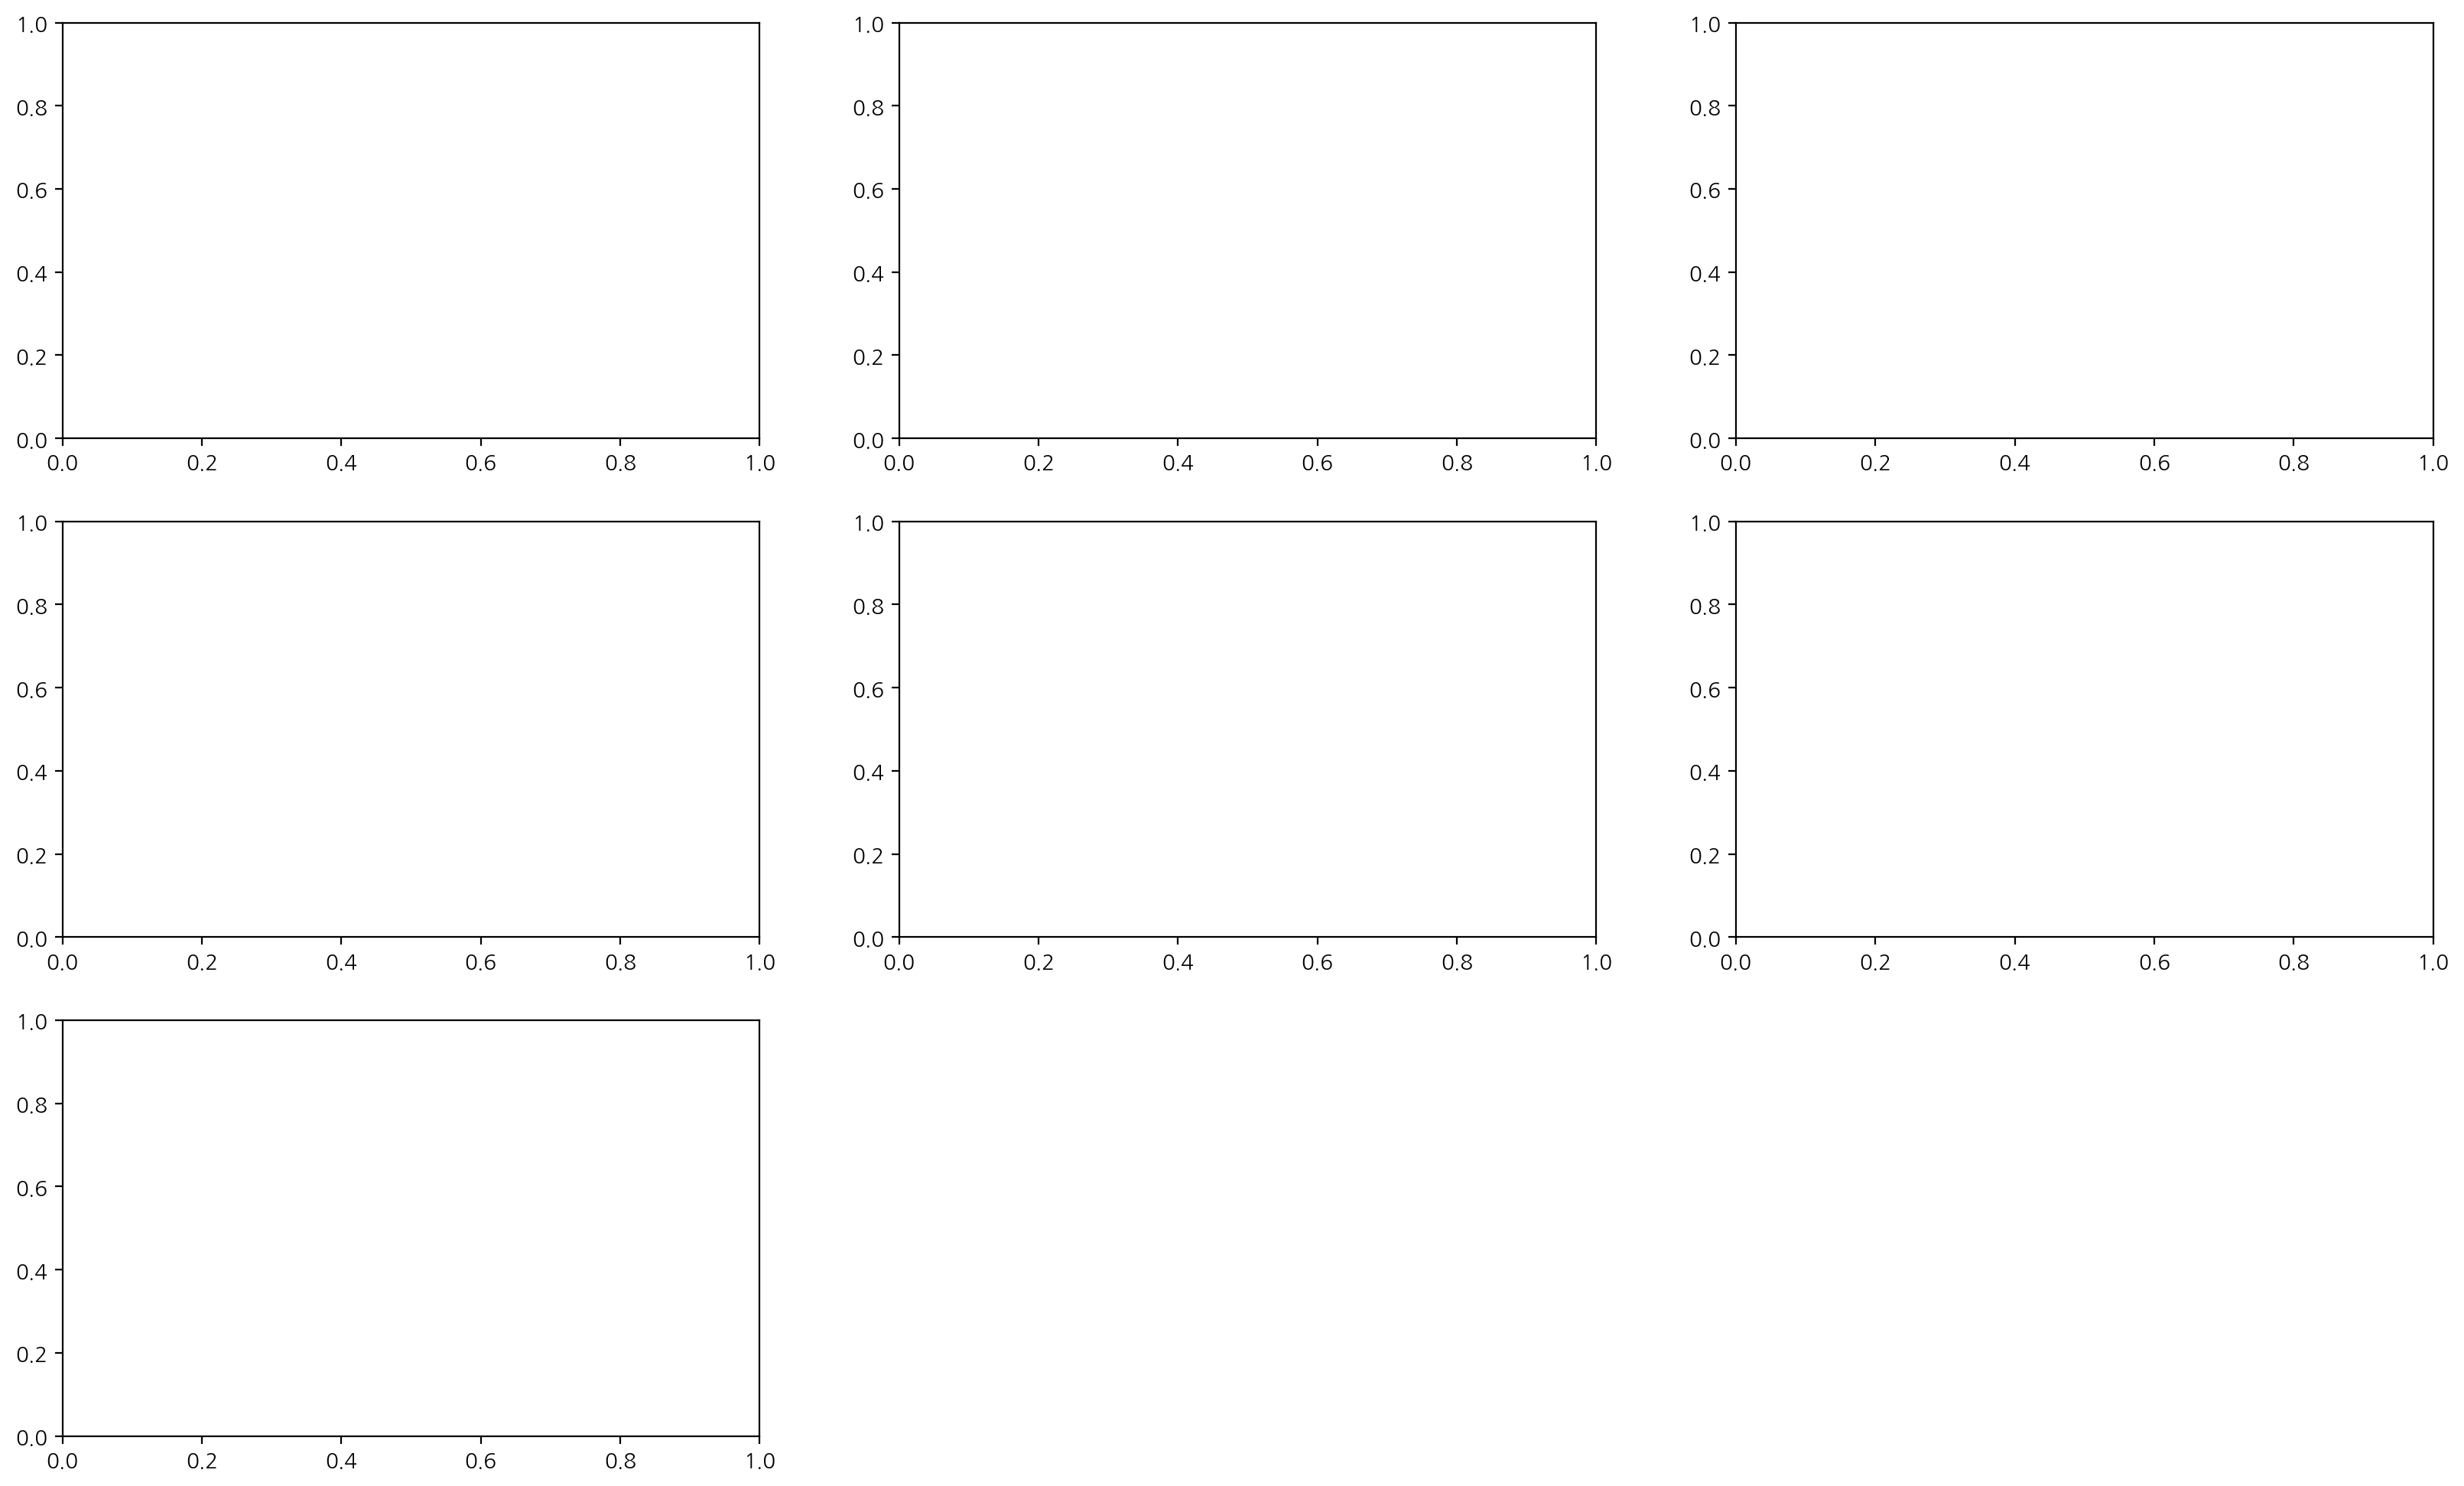

In [9]:
ead.uv()



┌▣ df.corr() ---- ---- ---- ----


,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
DayAvg_Temperature,1.000,-0.043,0.300,0.235,-0.279,0.058,0.085
DayDiff_Temperature,-0.043,1.000,-0.241,-0.372,-0.294,0.665,-0.113
DayAvg_RelativeHumidity,0.300,-0.241,1.000,0.257,-0.104,-0.300,0.259
DaySum_Rainfall,0.235,-0.372,0.257,1.000,0.119,-0.361,0.209
DayAvg_WindSpeed,-0.279,-0.294,-0.104,0.119,1.000,-0.053,0.281
DaySum_Sunshine,0.058,0.665,-0.300,-0.361,-0.053,1.000,0.056
Warning_Count,0.085,-0.113,0.259,0.209,0.281,0.056,1.000




┌▣ sns.heatmap(data=df.corr(), annot=True, fmt=".2f") ---- ---- ---- ----


<AxesSubplot: >

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 7 and the array at index 1 has size 5842

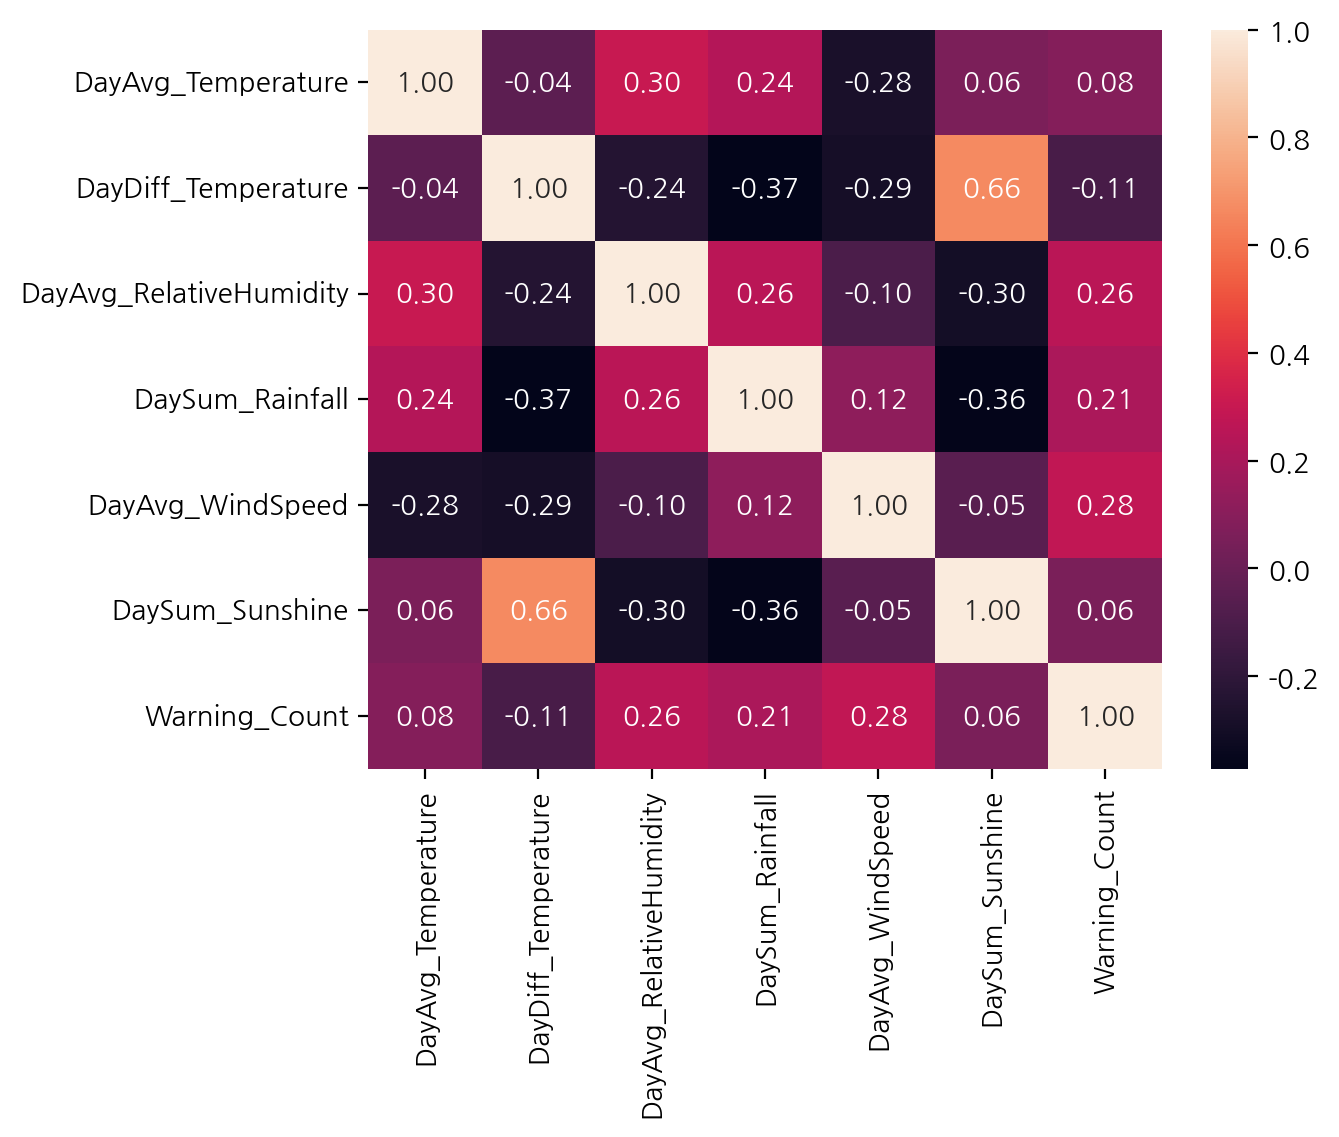

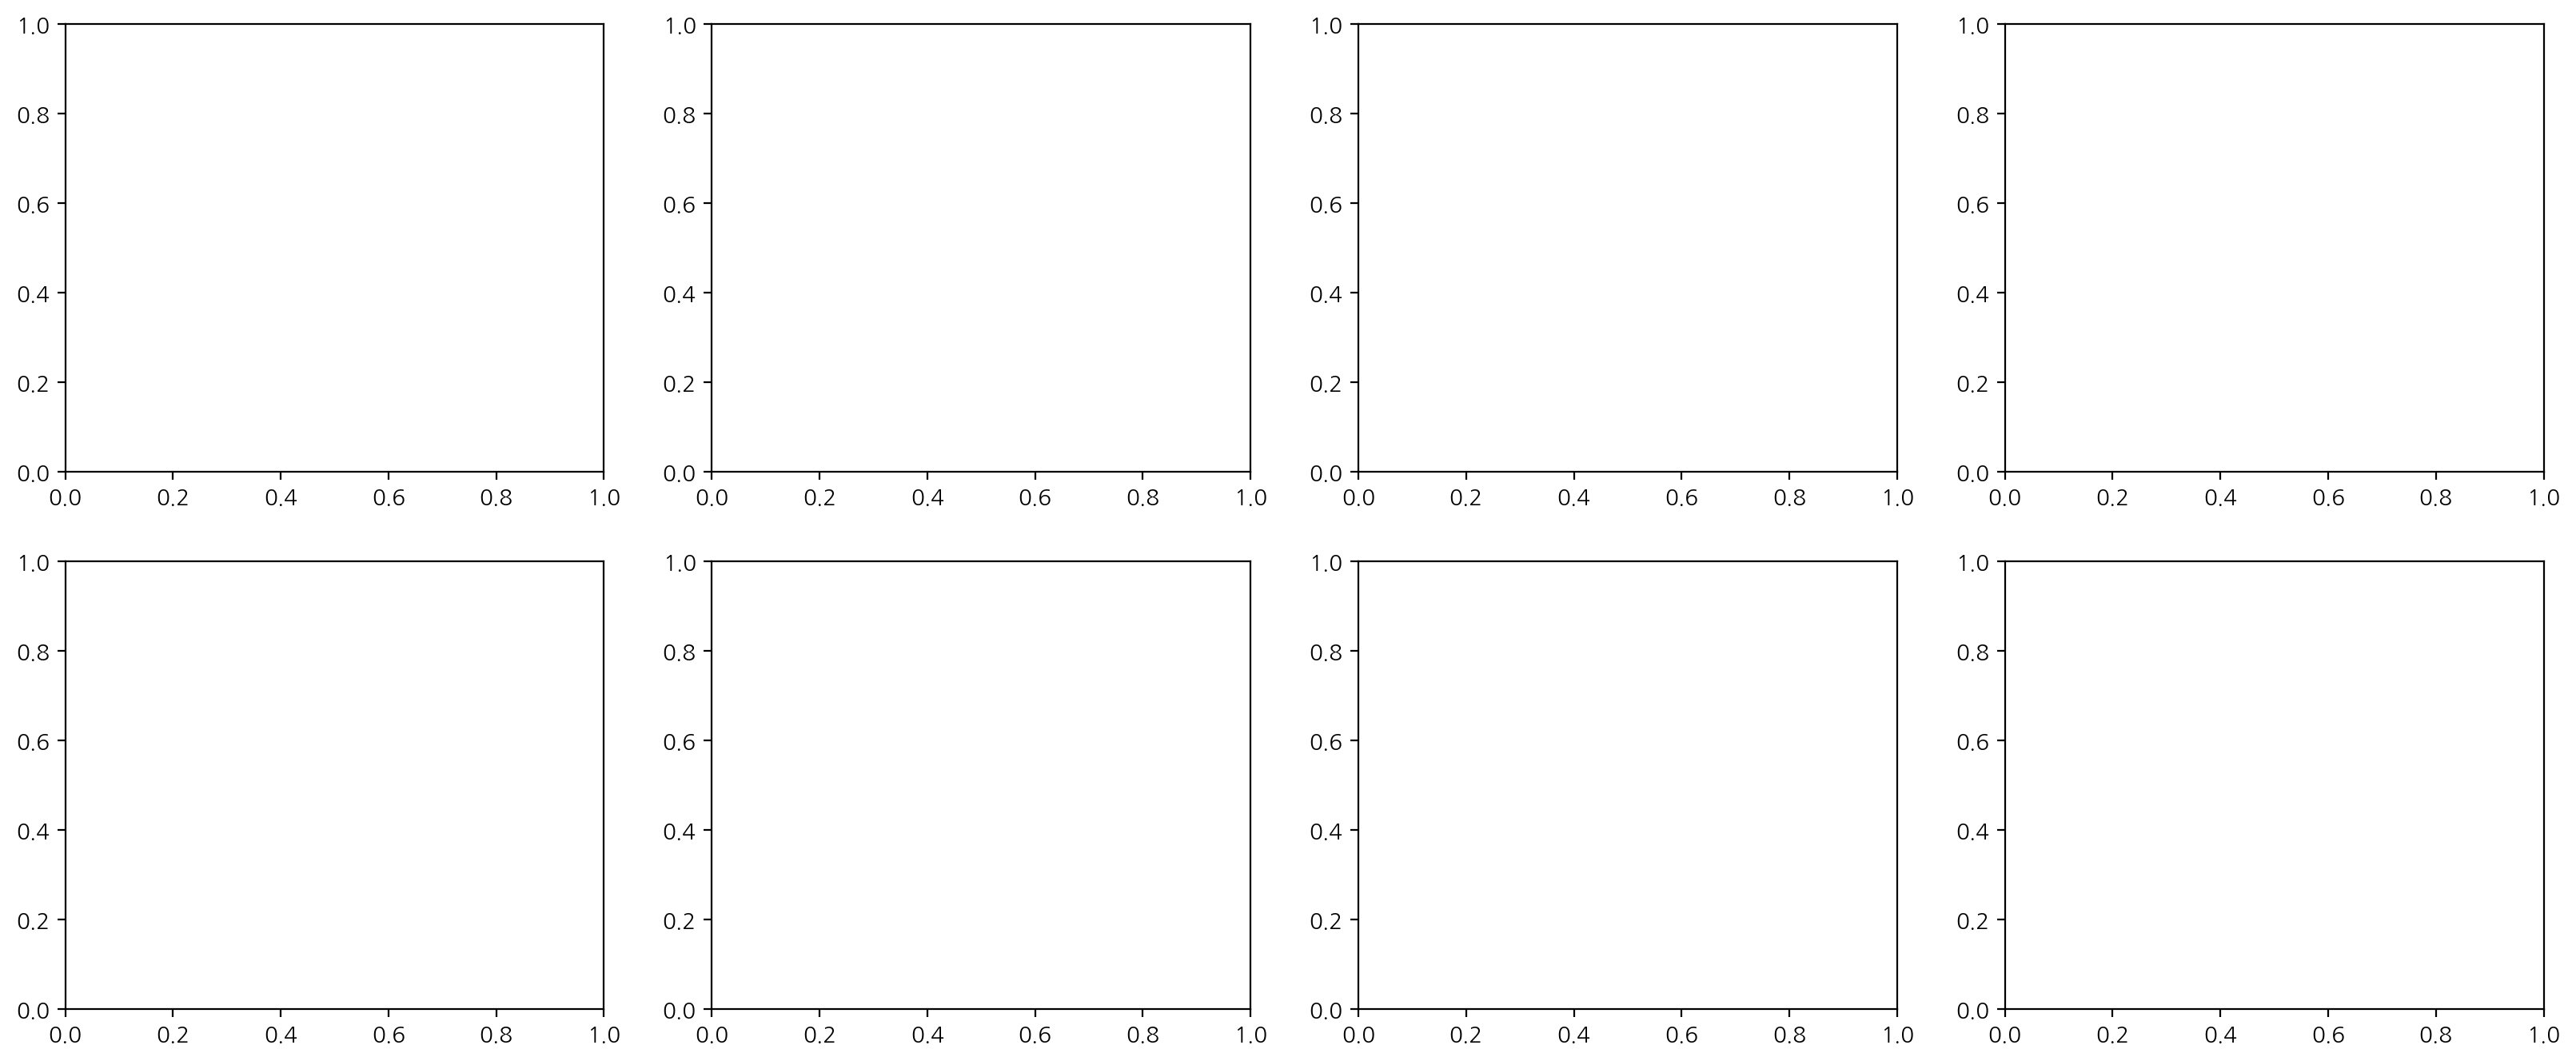

In [6]:
ead.mv()

# 함수 구현

In [ ]:
def AgriMarket_EDA(product: str, year: tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]

    if product not in product_w:
        print("해당 제품의 도매 거래내역이 없습니다.")

    elif (min(df_w[df_w["Product"] == product]["Y"]) > end) | (
        max(df_w[df_w["Product"] == product]["Y"]) < start
    ):
        print("해당 일자에 제품의 도매 거래내역이 없습니다.")

    else:
        df_w[
            (df_w["Product"] == product) & (df_w["Y"] >= start) & (df_w["Y"] <= end)
        ].groupby(["YMD"])[["Price"]].mean().plot(figsize=(20, 8))
        plt.title(f"{product} {start}~{end}년 도매가격 변동 그래프", fontsize=20)

    if product not in product_r:
        print("해당 제품의 소매 거래내역이 없습니다.")

    elif (min(df_r[df_r["Product"] == product]["Y"]) > end) | (
        max(df_r[df_r["Product"] == product]["Y"]) < start
    ):
        print("해당 일자에 제품의 소매 거래내역이 없습니다.")

    else:
        df_r[
            (df_r["Product"] == product) & (df_r["Y"] >= start) & (df_r["Y"] <= end)
        ].groupby(["YMD"])[["Price"]].mean().plot(figsize=(20, 8))
        plt.title(f"{product} {start}~{end}년 소매가격 변동 그래프", fontsize=20)

In [ ]:
AgriMarket_EDA("호박", (2005, 2020))

# 시각화

In [ ]:
def AgriMarket_viz(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

In [ ]:
AgriMarket_viz("호박", (2011, 2017))